In [1]:
#Libraries
library(data.table)
library(reshape2)
library(ggplot2)
library(RColorBrewer)
library(ggpmisc)
library(scales)


Attaching package: ‘reshape2’


The following objects are masked from ‘package:data.table’:

    dcast, melt



Attaching package: ‘ggpmisc’


The following object is masked from ‘package:ggplot2’:

    annotate




In [2]:
dfalllibs <- read.delim("data/dfmeansd_strand_dilutions.tsv", h=T)

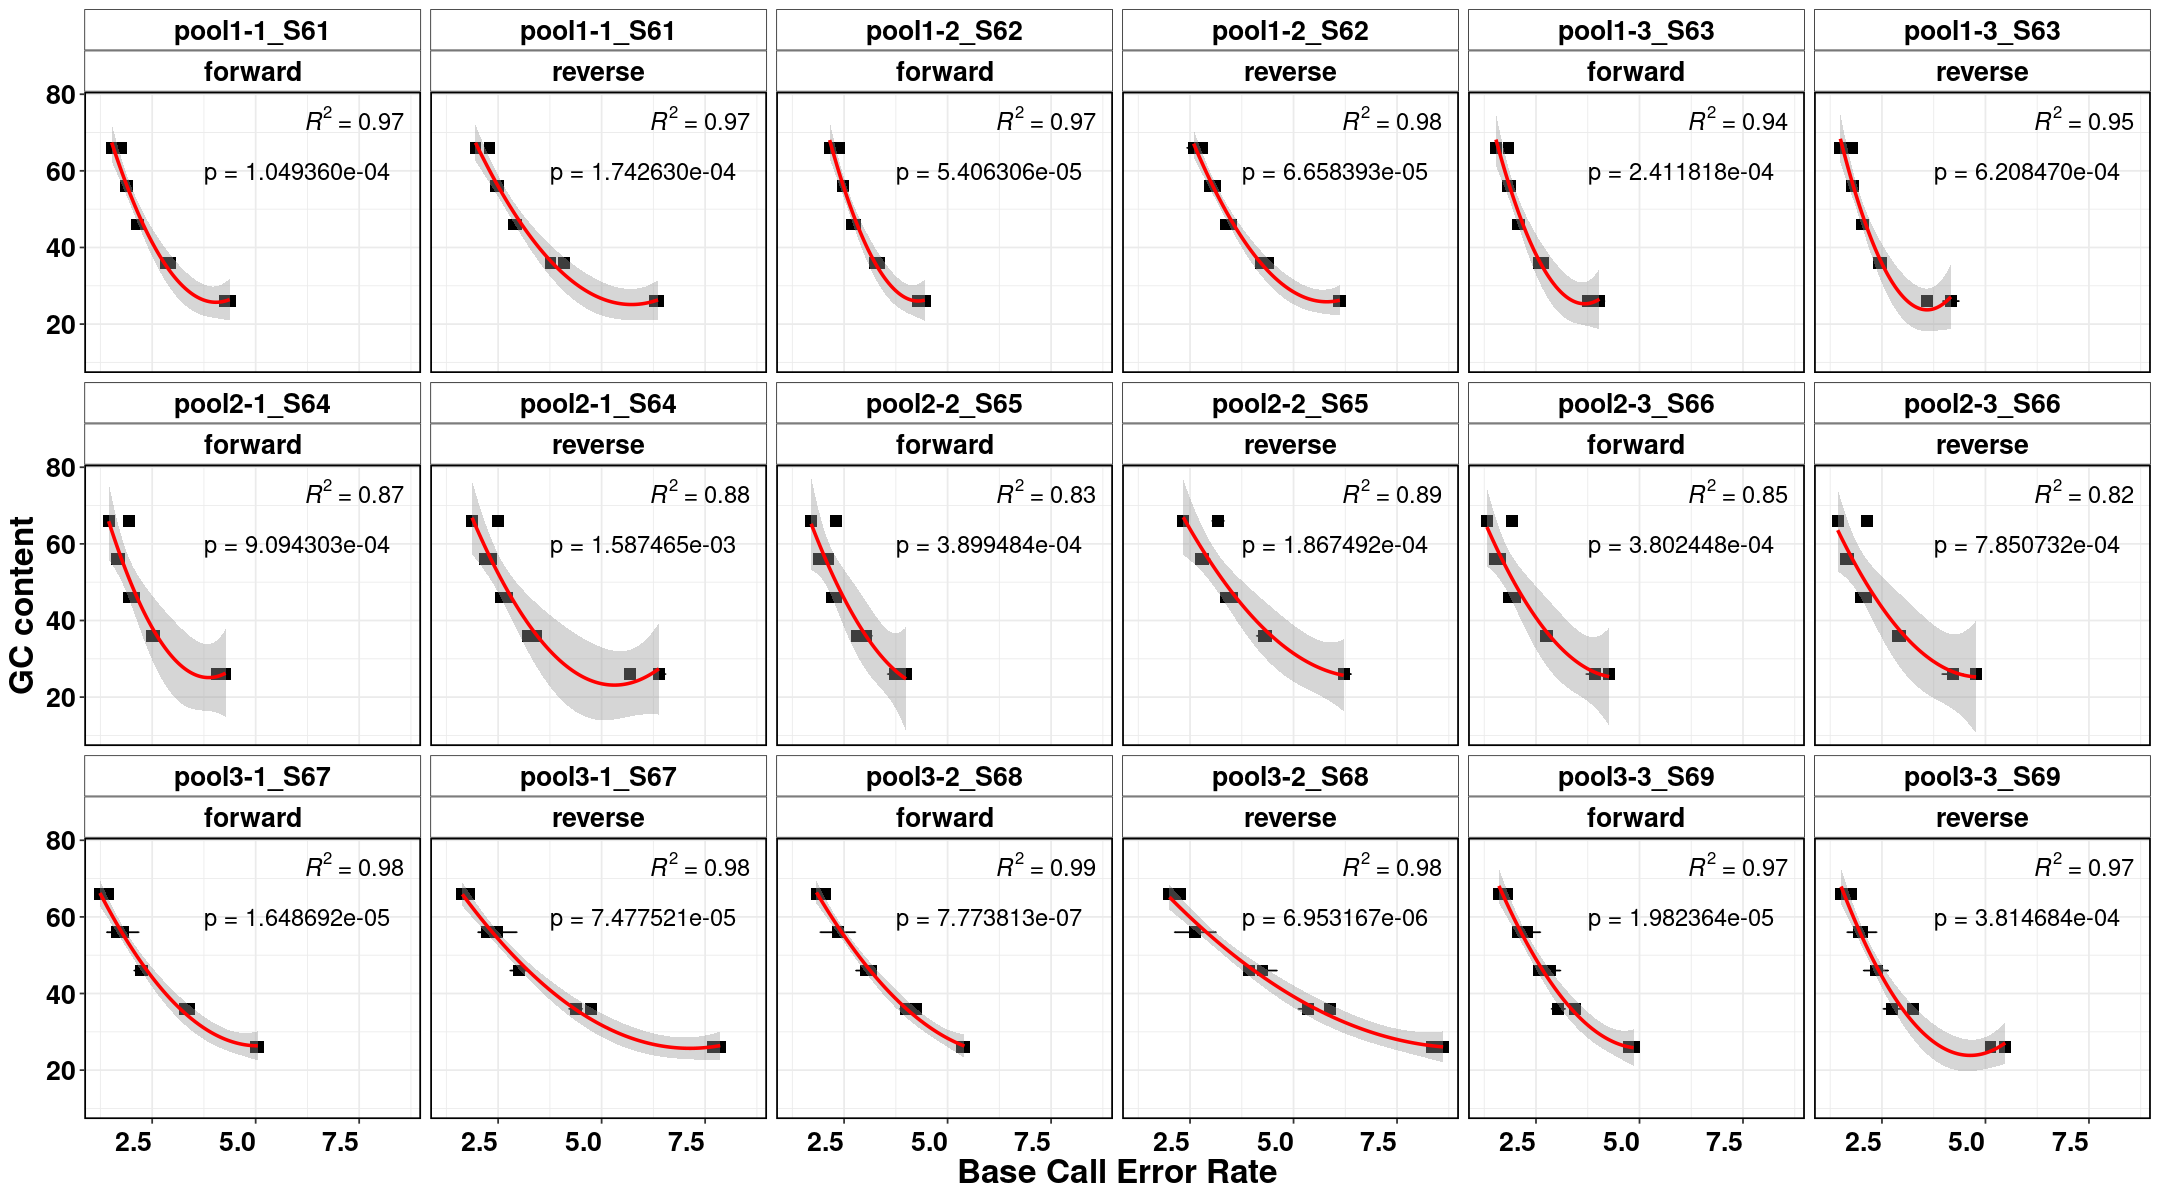

In [3]:
options(repr.plot.width=18, repr.plot.height=10)

ggplot(dfalllibs, aes(MeanRatio, GC)) +
  geom_point(shape = 15, size = 3) +
  geom_errorbar(aes(xmin=MeanRatio-StdRatio, xmax=MeanRatio+StdRatio), width=.3,position=position_dodge(0.05)) +
  facet_wrap(~ Sample+Strand, ncol = 6) +
  geom_smooth(method = "lm", color="red", formula = y~poly(x, 2)) +
  stat_poly_eq(formula = y~poly(x, 2), aes(label = ..rr.label..), 
               parse=TRUE, label.x.npc = "right",, size = 5) +
  stat_fit_glance(method = 'lm', geom = 'text', aes(label = paste0('p = ', format(..p.value.., 3))), 
                  label.x = 6, label.y = 60, size = 5) + 
  labs(y = "GC content", x = "Base Call Error Rate") +
  guides(colour = guide_legend(override.aes = list(size=5))) +
  theme_bw() + guides(fill=guide_legend(ncol=1))  +
  theme(panel.border = element_rect(colour = "black", fill=NA, size=1),
        axis.text.x = element_text(angle = 0, hjust = 1, vjust = 0.5, size = 16, face = "bold", colour = "black"),
        axis.text.y = element_text(angle = 0, size = 16, face = "bold", colour = "black"),
        axis.title=element_text(size=20, face = "bold", colour = "black"),
        strip.text.x = element_text(size = 16, face = "bold", colour = "black"),
        strip.background = element_rect(fill="white"),
        legend.title=element_blank())